# KNeighborsRegressor

In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
# importing dataframe
df = pd.read_csv("./data/data_2016-2021_hourly_sifted.csv", sep=";")

print(df.head(1))

   Year  Month  Day  Weekday  Hour  PRODUCTION (MWh)  CONSUMP (MWh)  \
0  2016      1   12        1     0            9109.0        11562.0   

   PRICE (EUR/MWh)  MAARIANHAMINA CLOUDS (1/8)  MAARIANHAMINA TEMP (C)  ...  \
0            21.11                         8.0                    -3.0  ...   

   CONSUMP (MWh) (day - 11)  CONSUMP (MWh) (day - 10)  \
0                   10005.0                   10370.0   

   CONSUMP (MWh) (day - 9)  CONSUMP (MWh) (day - 8)  CONSUMP (MWh) (day - 7)  \
0                  10925.0                  10925.0                  11741.0   

   PRICE (EUR/MWh) (day - 11)  PRICE (EUR/MWh) (day - 10)  \
0                       16.39                       16.47   

   PRICE (EUR/MWh) (day - 9)  PRICE (EUR/MWh) (day - 8)  \
0                      17.95                      15.96   

   PRICE (EUR/MWh) (day - 7)  
0                      17.68  

[1 rows x 53 columns]


### Split the data into training data and test data

In [3]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()

y = df_copy['PRICE (EUR/MWh)']
x = df_copy.drop(columns=['Year', 'PRICE (EUR/MWh)', 'PRODUCTION (MWh)', 'CONSUMP (MWh)'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y)

print("Training data: ")
print(" (x) " + str(x_train.shape))
print(" (y) " + str(y_train.shape))
print()
print("Test data: ")
print(" (x) " + str(x_test.shape))
print(" (y) " + str(y_test.shape))

Training data: 
 (x) (37056, 49)
 (y) (37056,)

Test data: 
 (x) (12353, 49)
 (y) (12353,)


### Create a model and train it

In [17]:
from sklearn.neighbors import KNeighborsRegressor

regr = KNeighborsRegressor(n_neighbors=2)
regr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

### Evaluate the performance

In [18]:
regr.score(x_test, y_test)

0.6615574885610197

### Plot the real prices and predicted prices

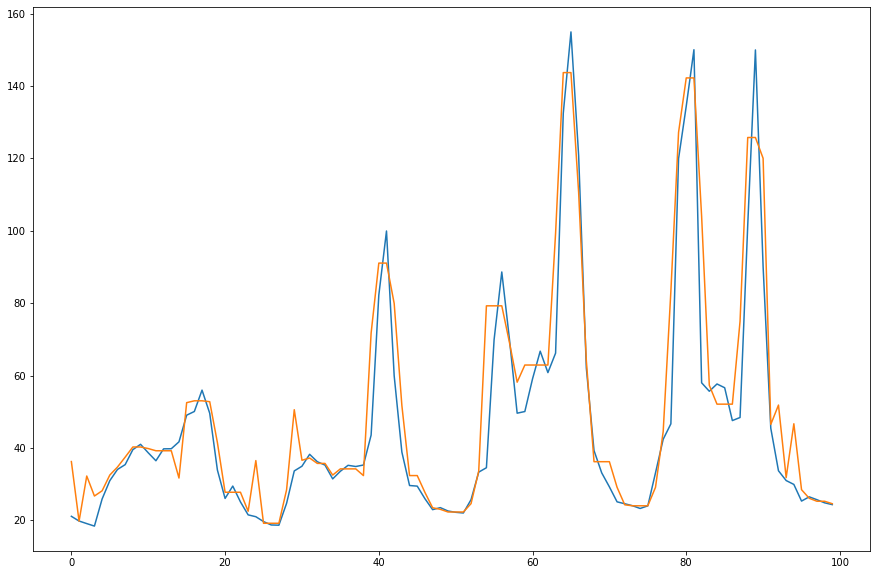

In [19]:
import matplotlib.pyplot as plt

# predictions for whole data
predictions = regr.predict(x)

start = 0
end = 100
y[start:end].plot(figsize=(15, 10))
plt.plot(np.arange(start, end), predictions[start:end])
plt.show()

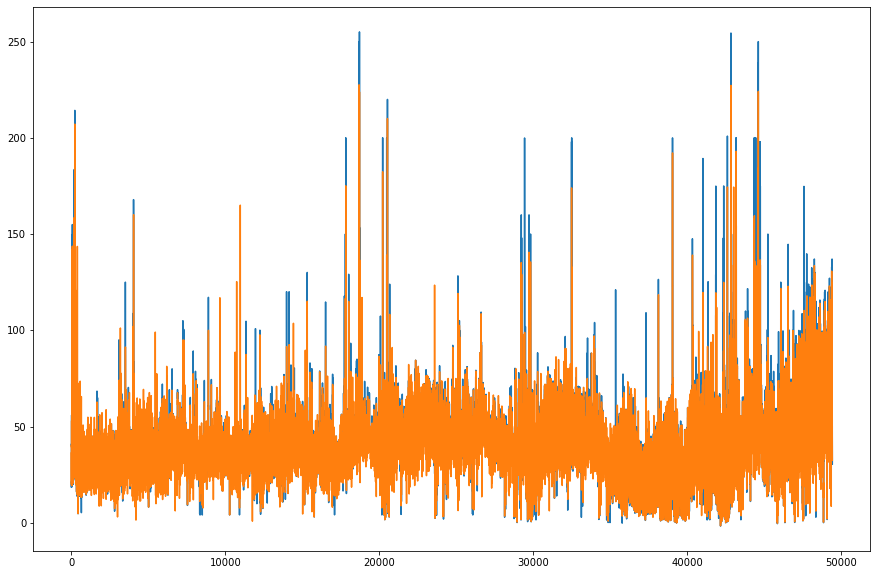

In [20]:
y.plot(figsize=(15, 10))
plt.plot(np.arange(len(y)), predictions)
plt.show()

### Save the model

In [8]:
import pickle

pickle.dump(regr, open('regression_model.sav', 'wb'))
print("Model saved!")

Model saved!
